<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Global-max-temperature-under-4-SSP-scenarios" data-toc-modified-id="Global-max-temperature-under-4-SSP-scenarios-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Global max temperature under 4 <a href="https://climatedata.ca/resource/understanding-shared-socio-economic-pathways-ssps/" target="_blank">SSP</a> scenarios</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#🥊-Challenge:-Can-you-plot-the-differences-in-maximum-temperature-in-Janurary-between-SSP-126-and-SSP-585?" data-toc-modified-id="🥊-Challenge:-Can-you-plot-the-differences-in-maximum-temperature-in-Janurary-between-SSP-126-and-SSP-585?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>🥊 Challenge: Can you plot the differences in maximum temperature in Janurary between SSP 126 and SSP 585?</a></span></li></ul></div>

# Global max temperature under 4 [SSP](https://climatedata.ca/resource/understanding-shared-socio-economic-pathways-ssps/) scenarios

We will use the [rasterio](https://rasterio.readthedocs.io/en/stable/intro.html) python package to read and process raster datasets. Rasterio is a highly useful module for raster processing which you can use for reading and writing several different raster formats in Python. Rasterio is based on [GDAL](https://gdal.org/index.html) and Python automatically registers all known GDAL drivers for reading supported formats when importing the module. Most common file formats include for example **TIFF** and **GeoTIFF**, **ASCII Grid** and **Erdas Imagine .img -files**.

Follow the documentation and install rasterio:  
For easy installation, run `! pip install rasterio` in a code cell  
For advanced installation, follow the instructions on [rasterio documentation](https://rasterio.readthedocs.io/en/stable/installation.html)

In [20]:
# Easy installation
 ! pip install rasterio

# Import libraries

In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Open raster file
tmax_ssp126 = rasterio.open('../data/MIROC6/wc2.1_10m_tmax_MIROC6_ssp126_2021-2040.tif')

The data used in this notebook is downloaded from [World Clim](https://www.worldclim.org/data/cmip6/cmip6_clim10m.html).

- Climate variable name: tx - monthly average maximum temperature (°C)
- Period: 2021-2040  
- GCM: MIROC6
- SSP: 126

In [4]:
# Check the coordinate reference system
tmax_ssp126.crs

CRS.from_epsg(4326)

EPSG code 4326 corresponds to the [WGS 84](https://epsg.io/4326)

In [5]:
# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
# Georeferenced raster datasets use affine transformations to map from image coordinates to world coordinates.
tmax_ssp126.transform

Affine(0.16666666666666666, 0.0, -180.0,
       0.0, -0.16666666666666666, 90.0)

In [6]:
# Dimensions
print(tmax_ssp126.width)
print(tmax_ssp126.height)

2160
1080


In [7]:
# Number of bands
tmax_ssp126.count

12

There are 12 bands in this raster file, each band correspond to a month in a year. e.g. band 1 -> Janurary

In [8]:
# Bounds of the file
tmax_ssp126.bounds

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)

In [9]:
# Driver (data format)
tmax_ssp126.driver

'GTiff'

In [9]:
# No data values for all channels
tmax_ssp126.nodatavals

(nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)

In [10]:
# All Metadata for the whole raster dataset
tmax_ssp126.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': nan,
 'width': 2160,
 'height': 1080,
 'count': 12,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.16666666666666666, 0.0, -180.0,
        0.0, -0.16666666666666666, 90.0)}

In [11]:
# Read the raster band as separate variable
tmax_ssp126_Jan = tmax_ssp126.read(1)
tmax_ssp126_Jun = tmax_ssp126.read(6)

In [12]:
# Check type of the variable 'band'
print(type(tmax_ssp126_Jan))

<class 'numpy.ndarray'>


In [13]:
# Data type of the values
print(tmax_ssp126_Jan.dtype)

float32


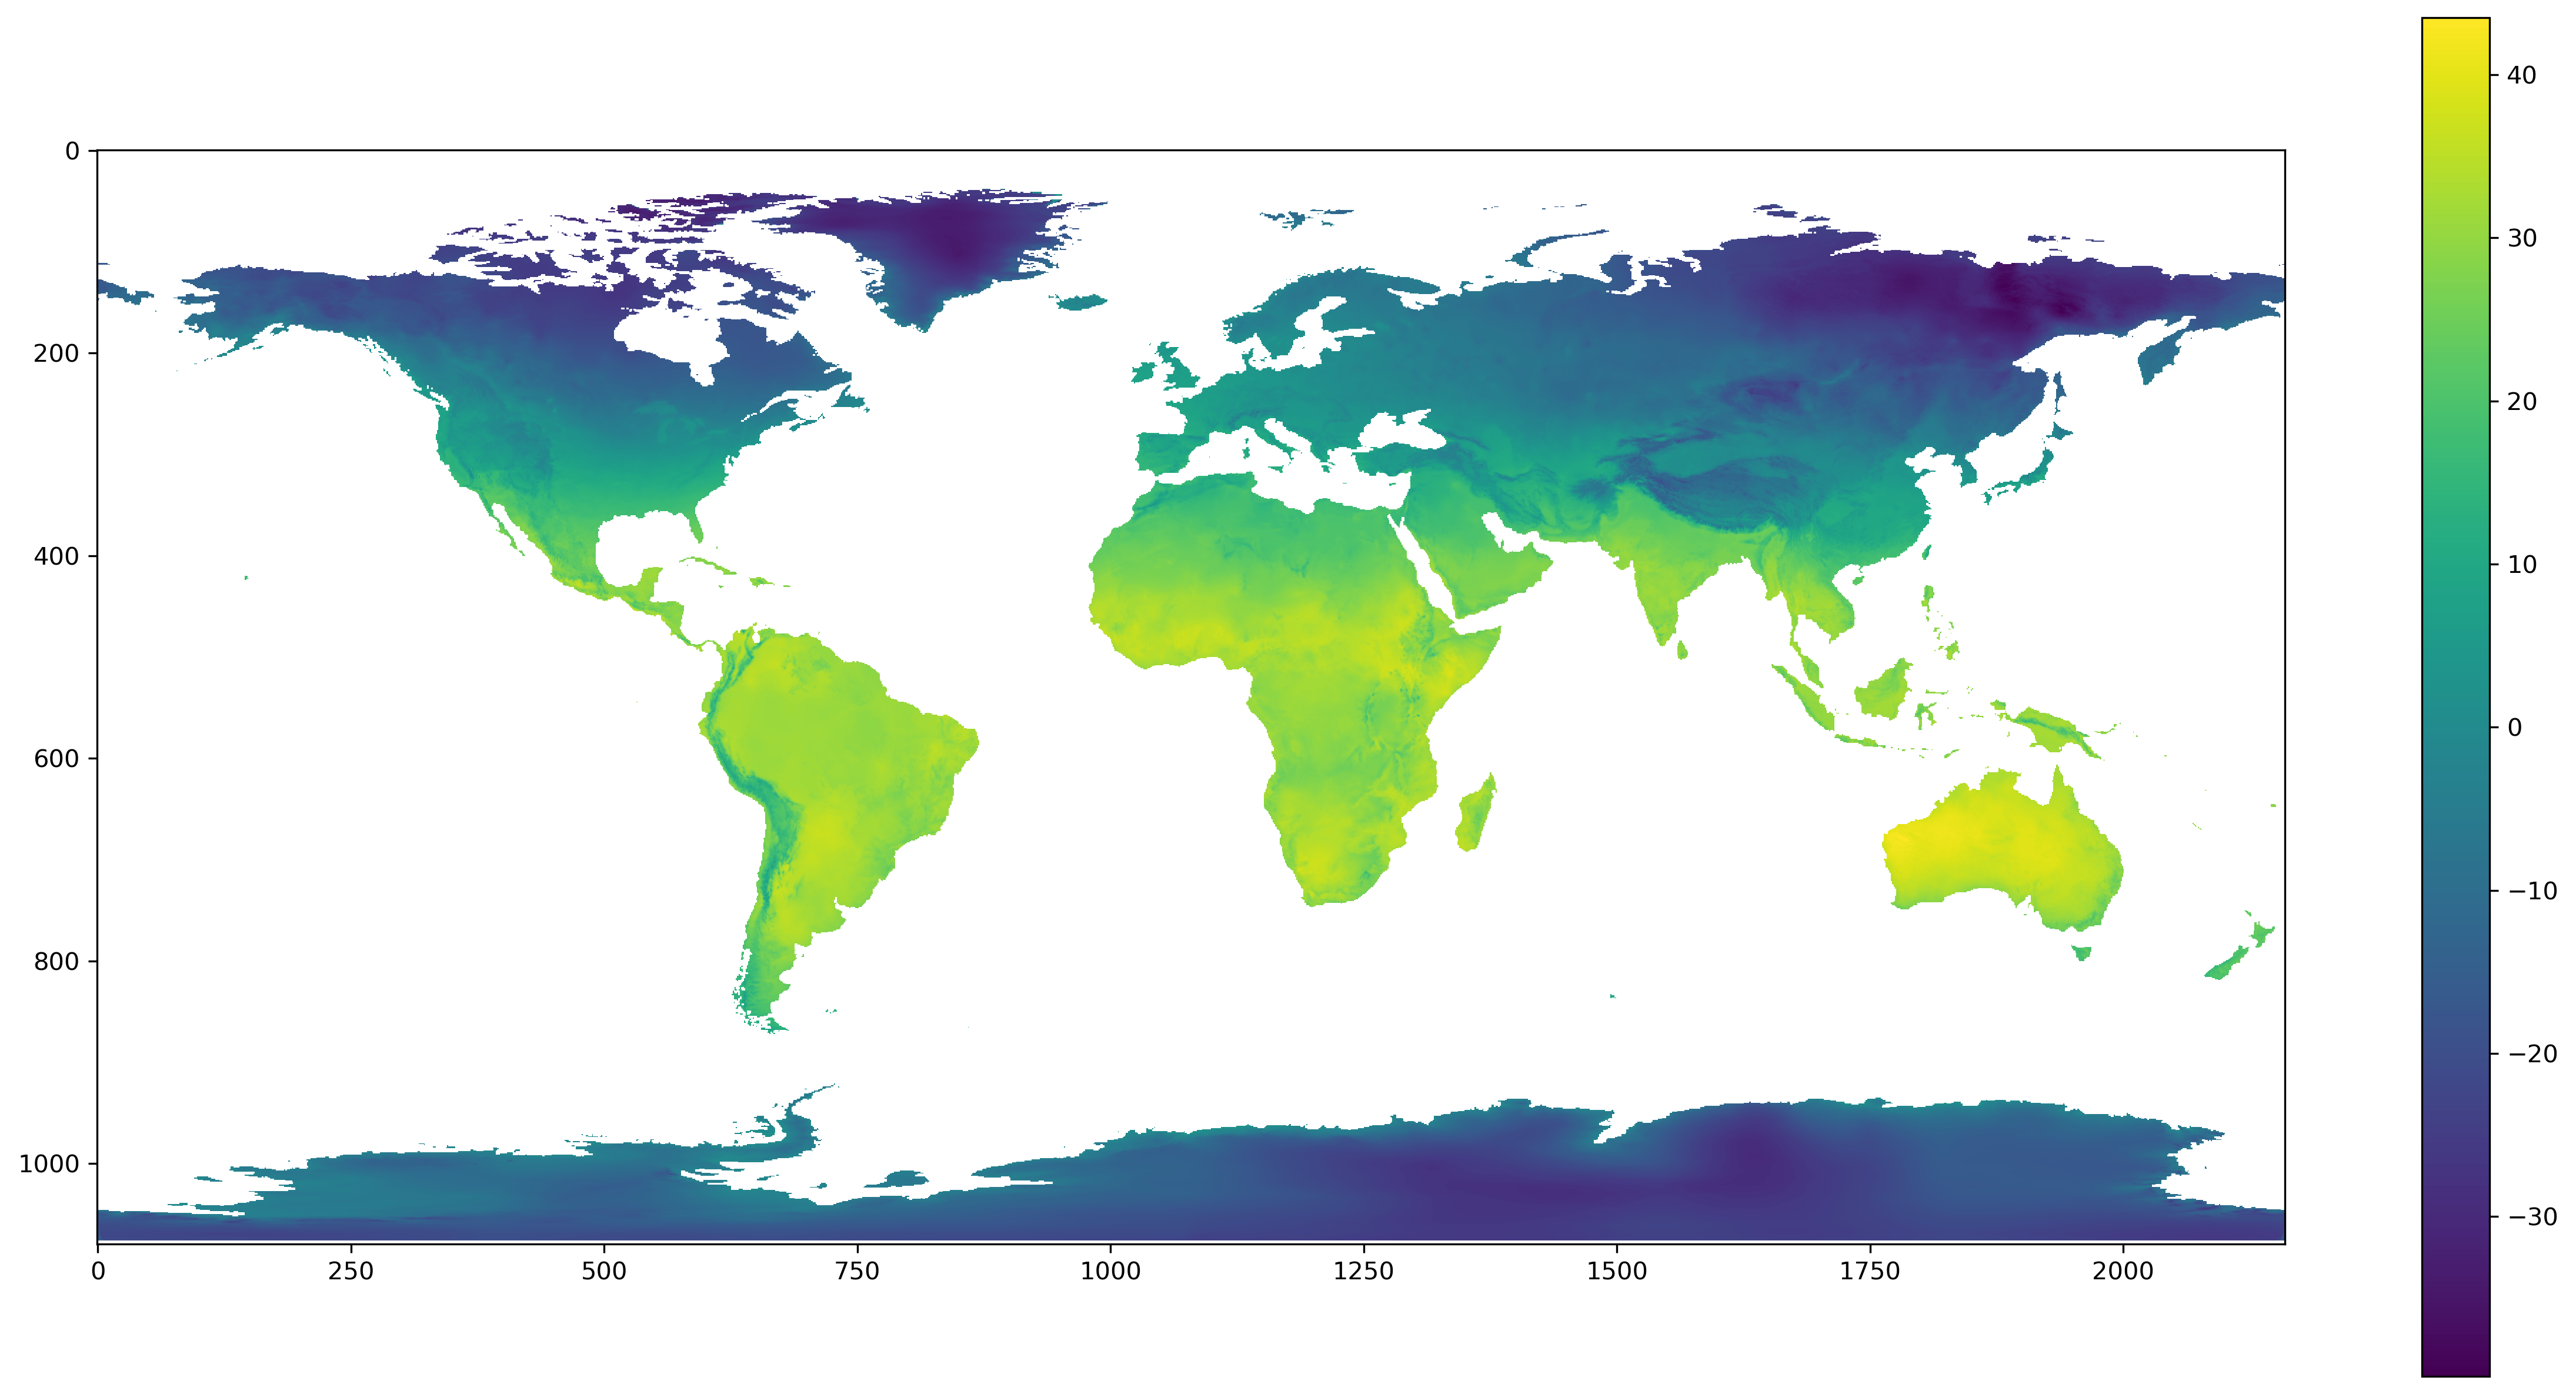

In [14]:
# Plot the global maximum temperature map in Janurary
plt.figure(dpi=300, figsize=(20,10))
plt.imshow(tmax_ssp126_Jan)
plt.colorbar()

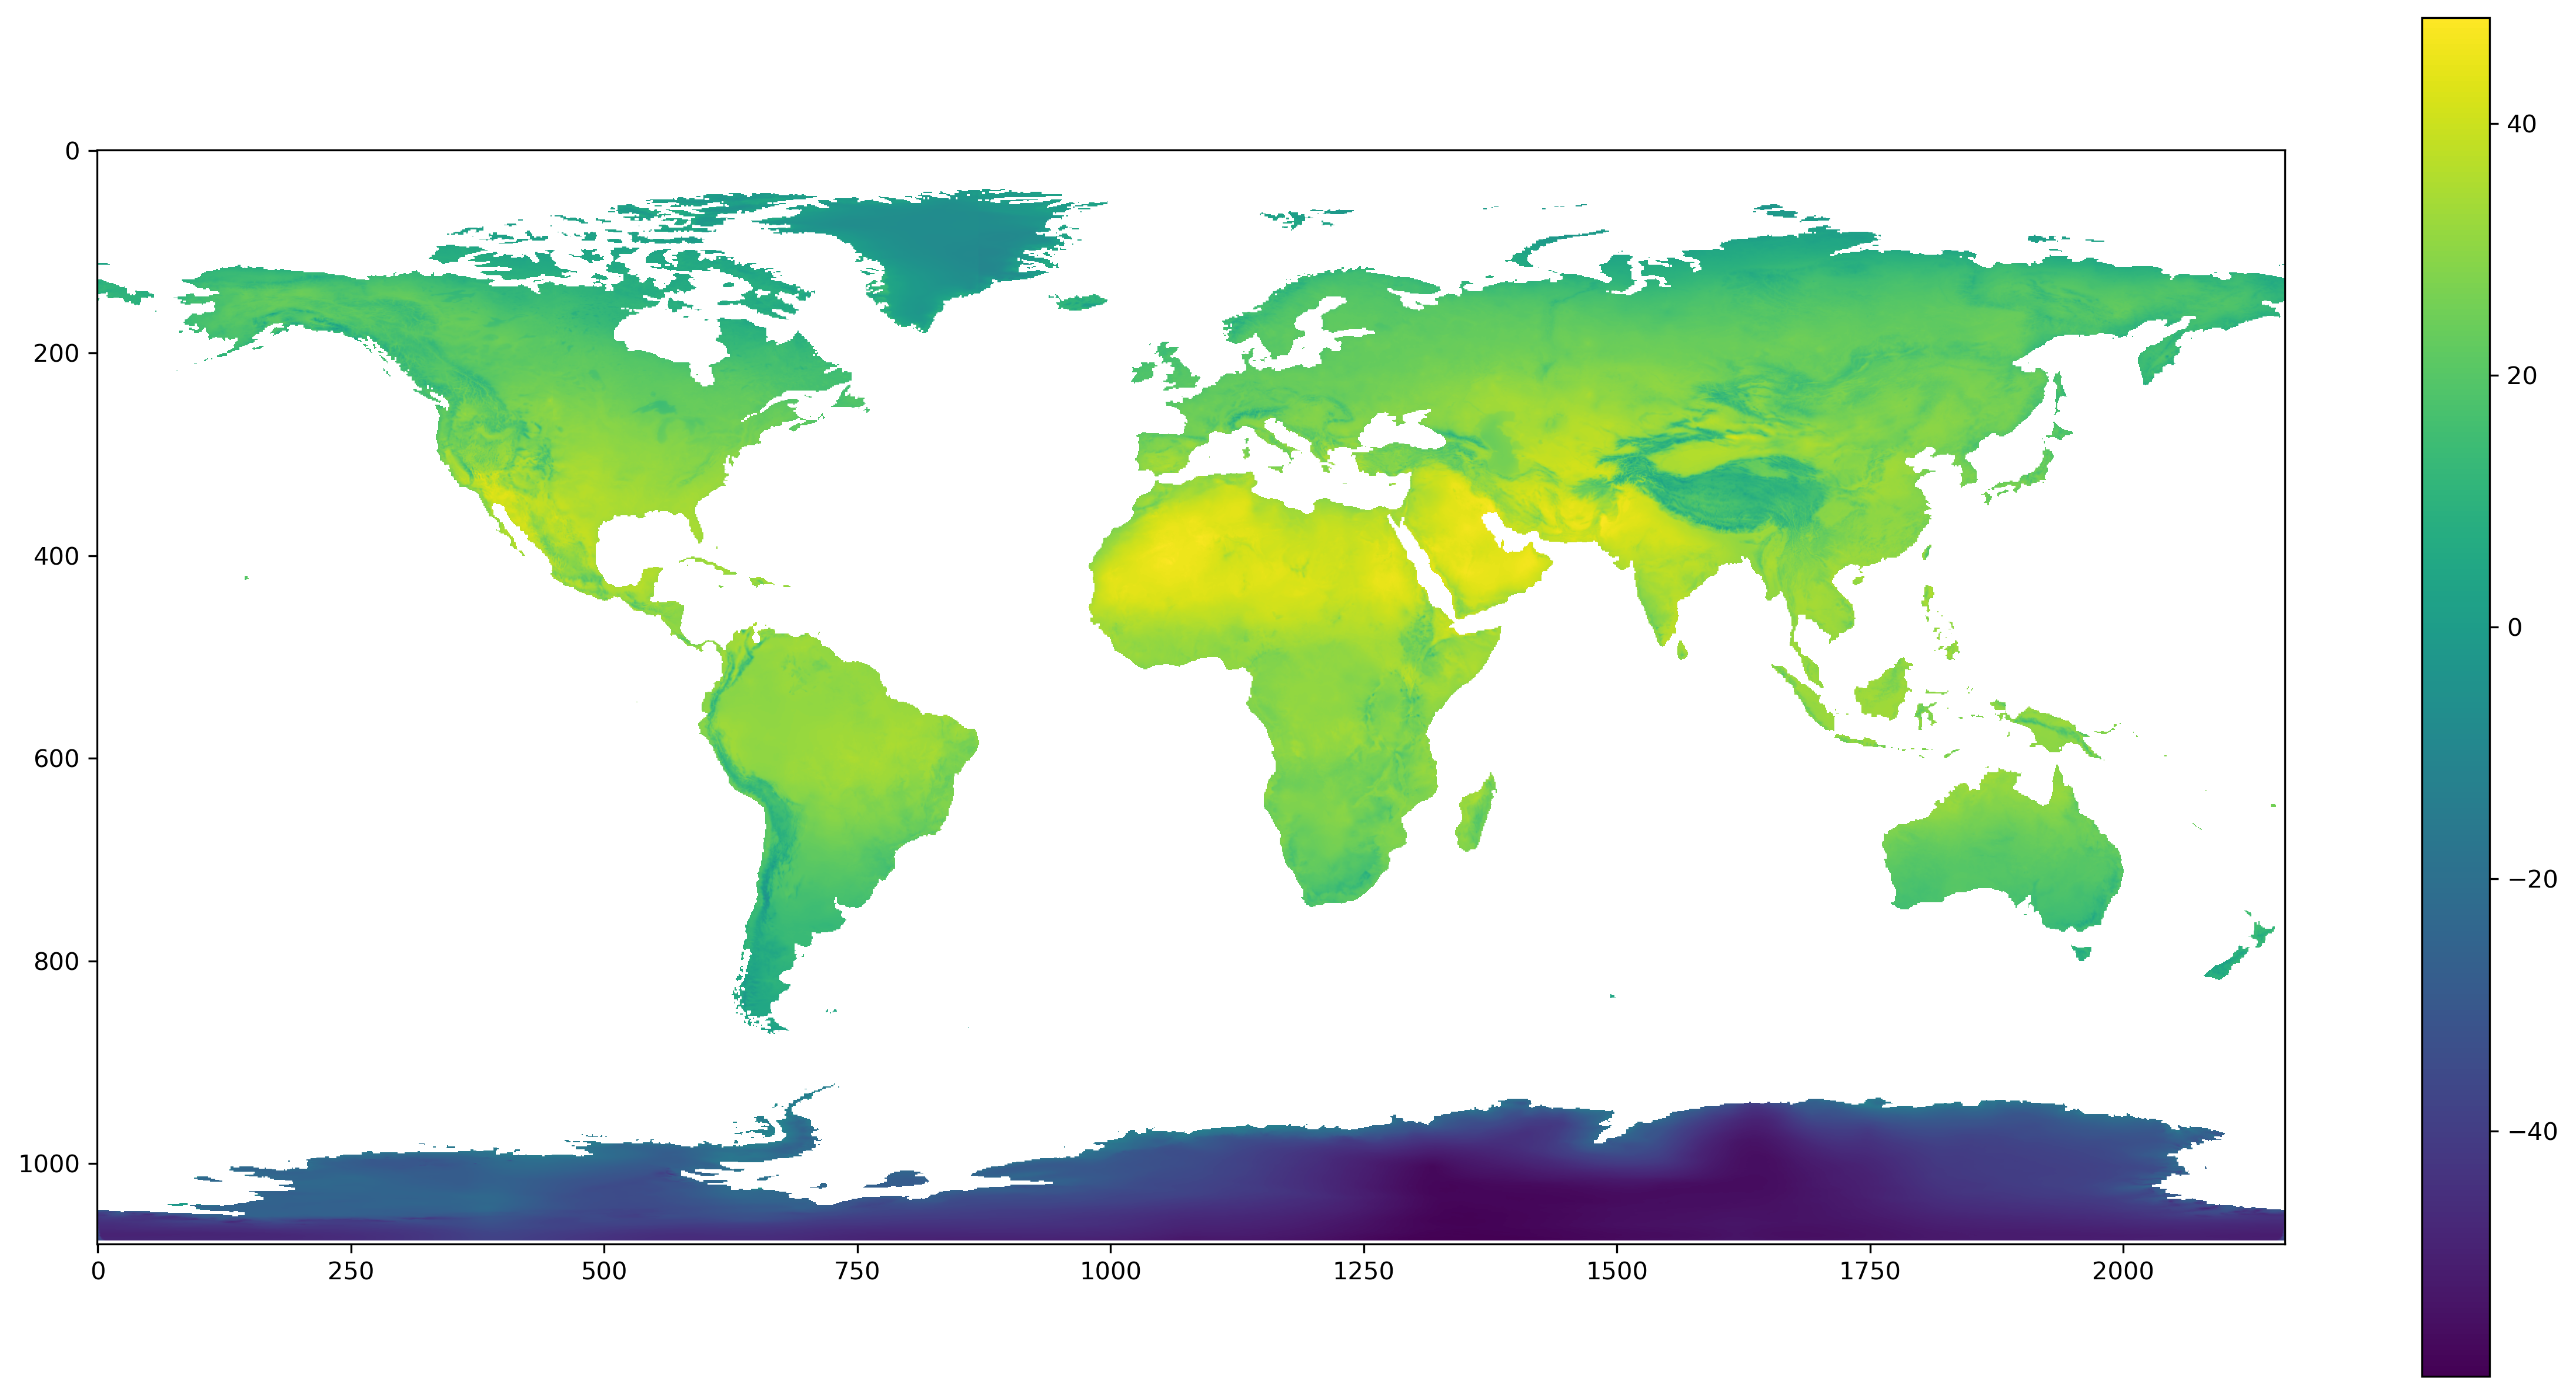

In [15]:
# Plot the global maximum temperature map in June
plt.figure(dpi=300, figsize=(20,10))
plt.imshow(tmax_ssp126_Jun)
plt.colorbar()

In [16]:
# Calculate the difference between Jun temperature and Jan temperature
tmax_ssp126_Jun_Jan_diff = tmax_ssp126_Jun - tmax_ssp126_Jan

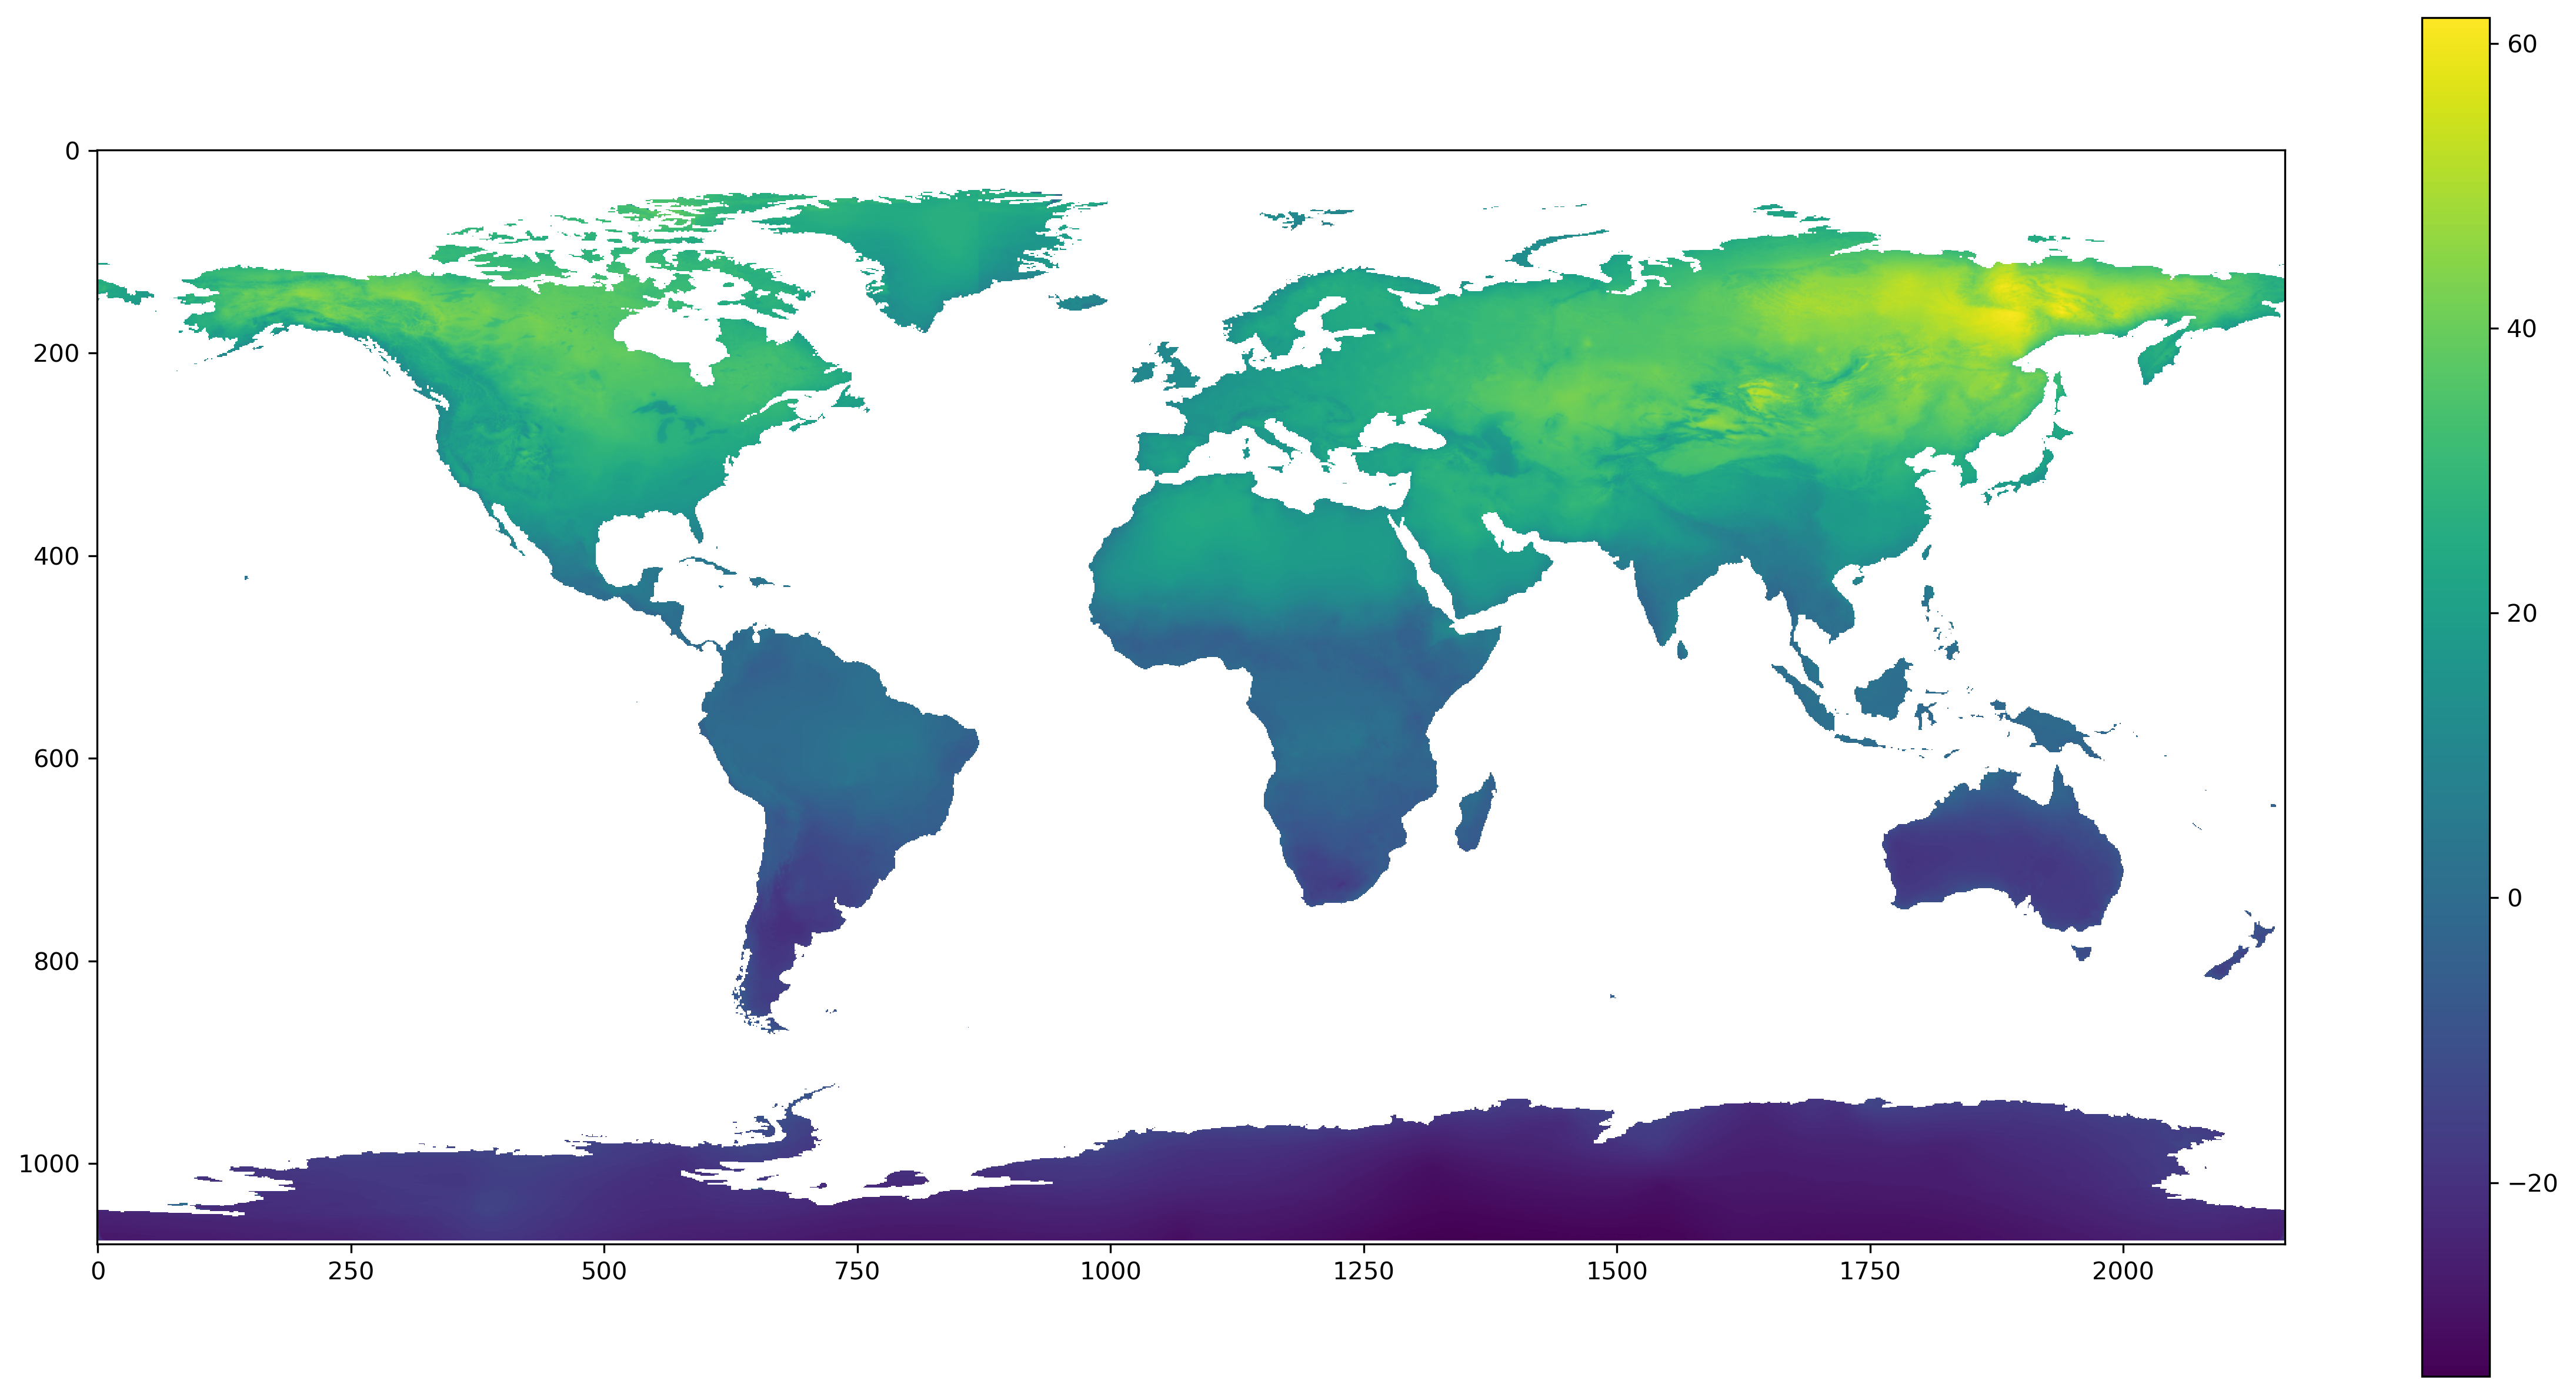

In [17]:
# Plot the global maximum temperature difference map between Janurary and June
plt.figure(dpi=300, figsize=(20,10))
plt.imshow(tmax_ssp126_Jun_Jan_diff)
plt.colorbar()

# 🥊 Challenge: Can you plot the differences in maximum temperature in Janurary between SSP 126 and SSP 585?
Hint: you will need to read a second raster dataset from the folder "MIROC6"

In [19]:
# Your code here